In [1]:
import numpy as np
import glob

In [3]:
all_files = glob.glob('rar_data/*')

In [9]:
good_files = []
for f in all_files:
    flen = sum(1 for line in open(f))
    if (flen != 0) and (flen >= 300):
        good_files.append(f)

In [10]:
print len(all_files)
print len(good_files)

35
14


In [11]:
good_files

['rar_data/rar_0.5_20._200_0.1_new_dyn0',
 'rar_data/rar_0._20._200_0.02_new_dyn0',
 'rar_data/rar_-1._20._200_0.02_new_dyn0',
 'rar_data/rar_-1._20._200_0.01_new_dyn0',
 'rar_data/rar_0.5_20._200_0.01_new_dyn0',
 'rar_data/rar_-1._20._200_0.1_new_dyn0',
 'rar_data/rar_0.25_20._200_0.5_new_dyn0',
 'rar_data/rar_-0.25_20._200_0.5_new_dyn0',
 'rar_data/rar_-1._20._200_0.05_new_dyn0',
 'rar_data/rar_-0.6_20._200_0.02_new_dyn0',
 'rar_data/rar_0.5_20._200_0.02_new_dyn0',
 'rar_data/rar_-0.6_20._200_0.5_new_dyn0',
 'rar_data/rar_-1._20._200_0.5_new_dyn0',
 'rar_data/rar_0.5_20._200_0.5_new_dyn0']

In [14]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('seaborn')

# Caveat

Working only with a subset of files since all the simulations didnt properly run on the server.

## R&R data 

In [45]:
subset_files = [good_files[3],good_files[-2], good_files[4], good_files[-1], good_files[]]
print subset_files

['rar_data/rar_-1._20._200_0.01_new_dyn0', 'rar_data/rar_-1._20._200_0.5_new_dyn0', 'rar_data/rar_0.5_20._200_0.01_new_dyn0', 'rar_data/rar_0.5_20._200_0.5_new_dyn0']


In [46]:
all_data = []
for f in subset_files:
    data = np.fromfile(f,sep='\n', count = 300*4)
    data = data.reshape(300,4)
    all_data.append(data)

In [70]:
test = all_data[3][:,[0,1]]


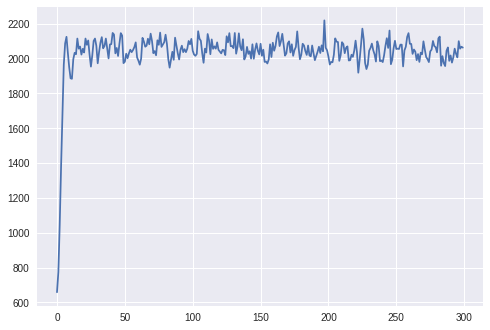

In [71]:
plt.plot(test[:,0], test[:,1])

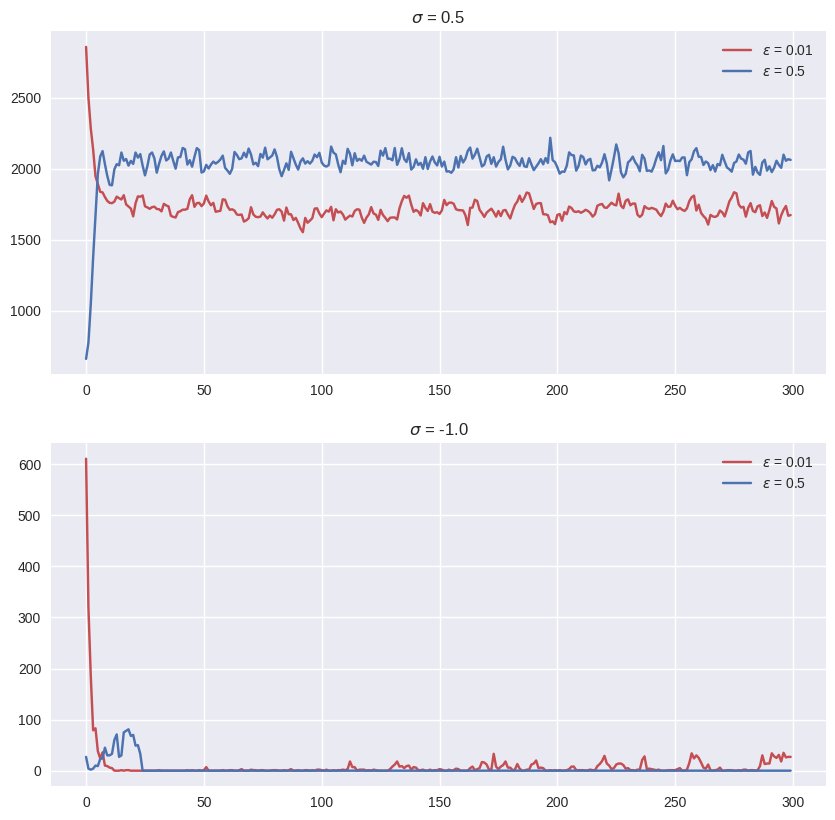

In [96]:
plt.figure(figsize=(10,10), dpi=100)
plt.subplot(211)
test = all_data[2]
plt.title('$\\sigma$ = 0.5')
plt.plot(test[:,0], test[:,1], 'r', label='$\\epsilon$ = 0.01')
plt.plot(all_data[3][:,0], all_data[3][:,1] , label='$\\epsilon$ = 0.5')
plt.legend()
plt.subplot(212)
plt.title('$\\sigma$ = -1.0')
plt.plot(all_data[0][:,0], all_data[0][:,1], 'r', label='$\\epsilon$ = 0.01')
plt.plot(all_data[1][:,0], all_data[1][:,1], label='$\\epsilon$ = 0.5')
plt.legend()
plt.savefig('no_accounting_diffs.pdf')
plt.savefig('no_accounting_diffs.png')

## Supply and Demand comparison

In [2]:
supply = glob.glob('supply/*')
demand = glob.glob('demand/*')
prices = glob.glob('prices/*')

In [3]:
sum(1 for line in open(supply[3]))

402

In [4]:
good_supply = []
good_demand = []
for f in supply:
    flen = sum(1 for line in open(f))
    if flen >= 300:
        good_supply.append(f)

In [5]:
for f in demand:
    flen = sum(1 for line in open(f))
    if flen >=300:
        good_demand.append(f)

In [6]:
good_price = []
for f in prices:
    flen = sum(1 for line in open(f))
    if flen >= 300:
        good_price.append(f)
print len(good_price)

5


In [7]:
print len(good_supply)
print len(good_demand)

5
5


In [8]:
print good_supply
print good_demand
print good_price

['supply/supply_-1._20._200_0.5_new_dyn0', 'supply/supply_-1._20._200_0.02_new_dyn0', 'supply/supply_-1._20._200_0.01_new_dyn0', 'supply/supply_-0.6_20._200_0.5_new_dyn0', 'supply/supply_0.5_20._200_0.5_new_dyn0']
['demand/demand_-1._20._200_0.01_new_dyn0', 'demand/demand_-0.6_20._200_0.5_new_dyn0', 'demand/demand_-1._20._200_0.5_new_dyn0', 'demand/demand_-1._20._200_0.02_new_dyn0', 'demand/demand_0.5_20._200_0.5_new_dyn0']
['prices/prices_-1._20._200_0.02_new_dyn0', 'prices/prices_0.5_20._200_0.5_new_dyn0', 'prices/prices_-1._20._200_0.5_new_dyn0', 'prices/prices_-1._20._200_0.01_new_dyn0', 'prices/prices_-0.6_20._200_0.5_new_dyn0']


In [9]:
subset_price = good_price[:4]
print subset_price

['prices/prices_-1._20._200_0.02_new_dyn0', 'prices/prices_0.5_20._200_0.5_new_dyn0', 'prices/prices_-1._20._200_0.5_new_dyn0', 'prices/prices_-1._20._200_0.01_new_dyn0']


In [10]:
all_price = []
for f in subset_price:
    data = np.fromfile(f, sep='\n', count=300*200)
    data = data.reshape(300,200)
    all_price.append(data)

In [29]:
test = all_price[0]


In [30]:
corrs = []
for lag in range(0,250):
    count = 0
    corrs_temp = []
    for i in range(0,300-lag):
        c = test[i].dot(test[i+lag])
        corrs_temp.append(c)
        count +=1
    corrs_temp = np.asarray(corrs_temp)
    corrs.append(np.sum(corrs_temp)/(200*count))
corrs = np.asarray(corrs)
# corrs /= corrs[0]

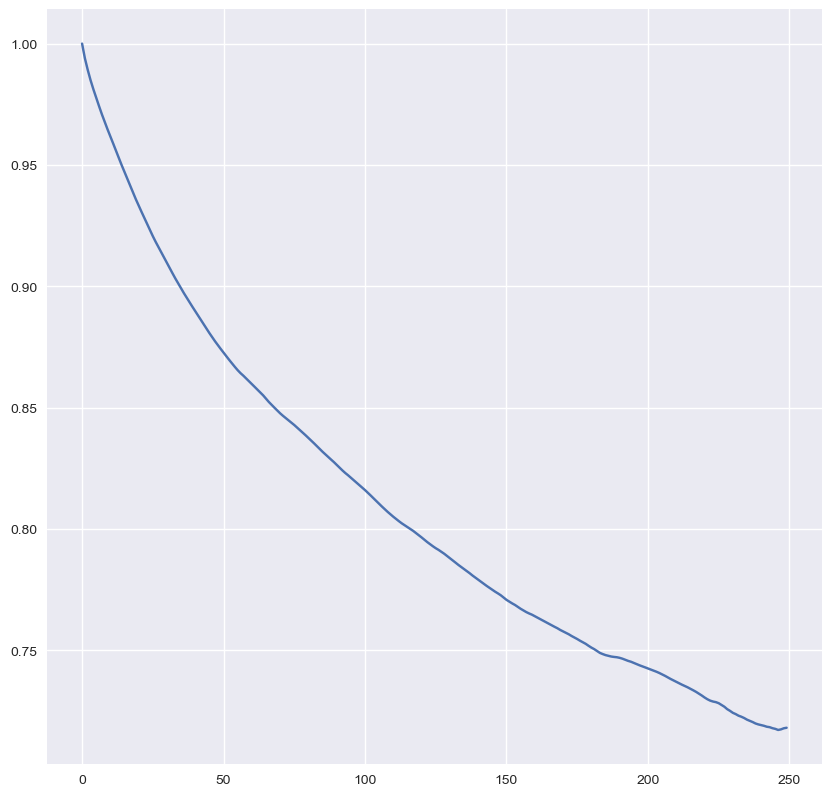

In [31]:
plt.figure(figsize=(10,10), dpi=100)
plt.plot(corrs)

In [153]:
N = 300
lag = 3
steps = range(0,300, lag)
print steps

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294, 297]


In [150]:
np.correlate([1, 2, 3], [0, 1, 0.5], "full")

array([0.5, 2. , 3.5, 3. , 0. ])

In [154]:
zip(range(0,300, lag), range(1,300, lag))

[(0, 1),
 (3, 4),
 (6, 7),
 (9, 10),
 (12, 13),
 (15, 16),
 (18, 19),
 (21, 22),
 (24, 25),
 (27, 28),
 (30, 31),
 (33, 34),
 (36, 37),
 (39, 40),
 (42, 43),
 (45, 46),
 (48, 49),
 (51, 52),
 (54, 55),
 (57, 58),
 (60, 61),
 (63, 64),
 (66, 67),
 (69, 70),
 (72, 73),
 (75, 76),
 (78, 79),
 (81, 82),
 (84, 85),
 (87, 88),
 (90, 91),
 (93, 94),
 (96, 97),
 (99, 100),
 (102, 103),
 (105, 106),
 (108, 109),
 (111, 112),
 (114, 115),
 (117, 118),
 (120, 121),
 (123, 124),
 (126, 127),
 (129, 130),
 (132, 133),
 (135, 136),
 (138, 139),
 (141, 142),
 (144, 145),
 (147, 148),
 (150, 151),
 (153, 154),
 (156, 157),
 (159, 160),
 (162, 163),
 (165, 166),
 (168, 169),
 (171, 172),
 (174, 175),
 (177, 178),
 (180, 181),
 (183, 184),
 (186, 187),
 (189, 190),
 (192, 193),
 (195, 196),
 (198, 199),
 (201, 202),
 (204, 205),
 (207, 208),
 (210, 211),
 (213, 214),
 (216, 217),
 (219, 220),
 (222, 223),
 (225, 226),
 (228, 229),
 (231, 232),
 (234, 235),
 (237, 238),
 (240, 241),
 (243, 244),
 (246, 2